/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.2304 - loss: 1.8375 - val_accuracy: 0.3500 - val_loss: 1.6890
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3603 - loss: 1.6525 - val_accuracy: 0.4152 - val_loss: 1.5055
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4225 - loss: 1.5033 - val_accuracy: 0.4500 - val_loss: 1.4322
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4524 - loss: 1.4267 - val_accuracy: 0.4726 - val_loss: 1.3616
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4854 - loss: 1.3440 - val_accuracy: 0.4823 - val_loss: 1.3532
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5126 - loss: 1.2960 - val_accuracy: 0.4923 - val_loss: 1.3303
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5328 - loss: 1.2370 - val_accuracy: 0.5130 - val_loss: 1.2797
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5512 - loss: 1.1800 - val_accuracy

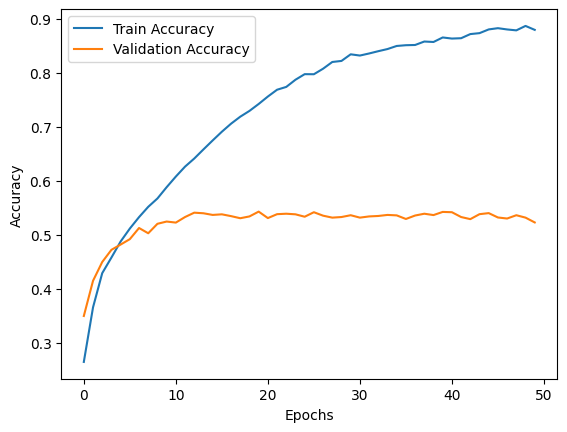

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


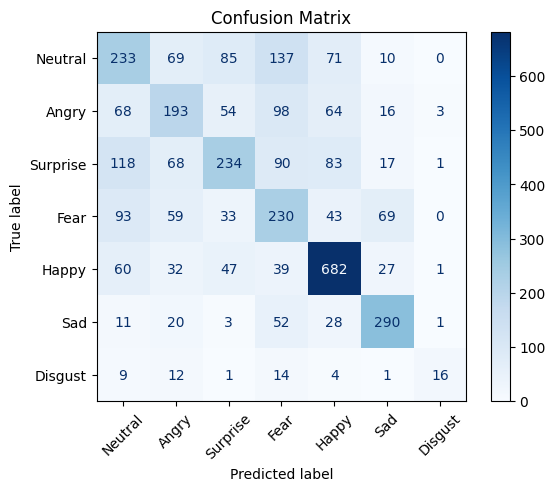

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import confusion_matrix and ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
csv_path = "/content/drive/MyDrive/EmotionLens/dataset/new_splitted_64*64.csv"  # Update path
df = pd.read_csv(csv_path)

# Define image size
image_size = 64  # Use 64 for resized dataset, 48 if original

# Convert labels to categorical (one-hot encoding)
emotions = df["emotion"].unique()
label_map = {emotion: i for i, emotion in enumerate(emotions)}  # Map emotions to numbers
df["emotion"] = df["emotion"].map(label_map)  # Replace emotion names with numbers

# Convert pixel data to numpy arrays
X = np.array([np.array(row.split(), dtype=np.uint8).reshape(image_size, image_size, 1) for row in df["pixels"]])
y = to_categorical(df["emotion"], num_classes=len(emotions))  # Convert to one-hot

# Normalize images (scale pixels from 0-255 to 0-1)
X = X / 255.0

# Split into training & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(emotions), activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

# Save model
model.save('my_model.keras')

# Evaluate model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"✅ Validation Accuracy: {val_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# CONFUSION MATRIX
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions)  # Use emotions for display labels
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()